[*********************100%***********************]  1 of 1 completed
            Adj Close  Daily Return  30 Day Volatility
Date                                                  
2023-08-24  33.967583      0.004348           0.121977
2023-08-27  34.114628      0.004329           0.121842
2023-08-28  33.869553     -0.007184           0.124958
2023-08-29  33.428413     -0.013025           0.132495
2023-08-30  34.163643      0.021994           0.144616


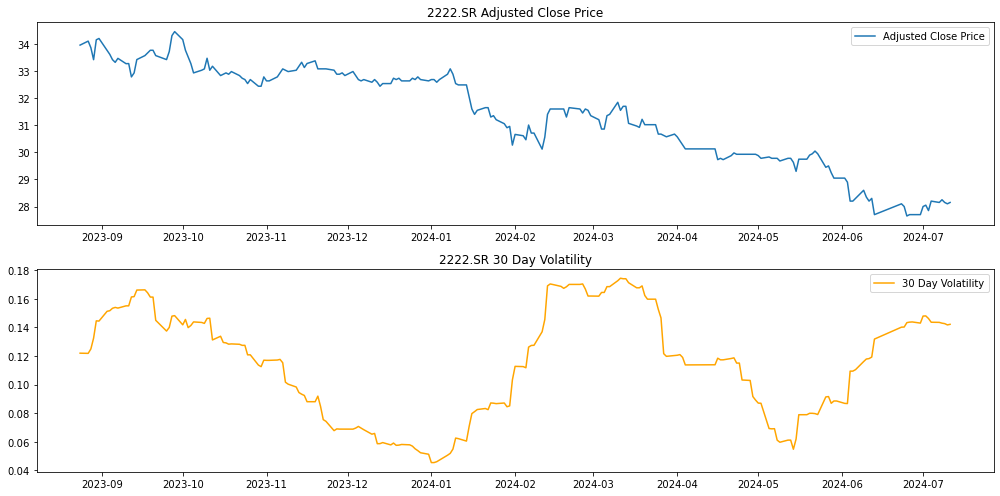

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ticker symbol and date range
ticker = '2222.SR'
end_date = pd.to_datetime('today').normalize()
start_date = end_date - pd.DateOffset(years=1)

# Download historical data for Saudi Aramco
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Calculate the rolling volatility (30-day window)
data['30 Day Volatility'] = data['Daily Return'].rolling(window=30).std() * np.sqrt(252)

# Drop NaN values
data = data.dropna()

# Display the first few rows of the data with volatility
print(data[['Adj Close', 'Daily Return', '30 Day Volatility']].head())

# Plot the Adjusted Close price and the 30-day rolling volatility
plt.figure(figsize=(14, 7))

# Plot Adjusted Close Price
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adjusted Close Price')
plt.title(f'{ticker} Adjusted Close Price')
plt.legend()

# Plot 30 Day Volatility
plt.subplot(2, 1, 2)
plt.plot(data['30 Day Volatility'], label='30 Day Volatility', color='orange')
plt.title(f'{ticker} 30 Day Volatility')
plt.legend()

plt.tight_layout()
plt.show()


Value at Risk (VaR) at 95.0% confidence level: -0.013051154854913804


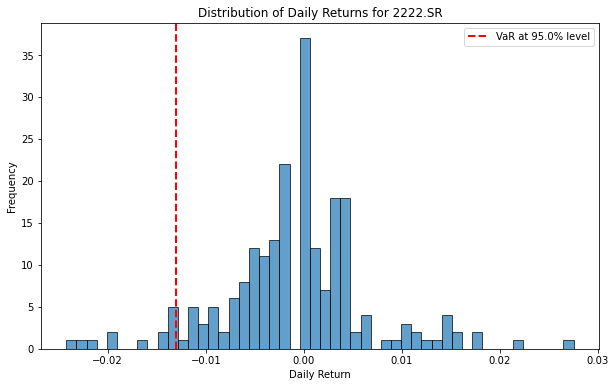

In [2]:
# Define the confidence level
confidence_level = 0.95

# Calculate the VaR
VaR = np.percentile(data['Daily Return'], (1 - confidence_level) * 100)

# Display the VaR
print(f'Value at Risk (VaR) at {confidence_level*100}% confidence level: {VaR}')

# Plot the distribution of daily returns and mark the VaR
plt.figure(figsize=(10, 6))
plt.hist(data['Daily Return'], bins=50, edgecolor='k', alpha=0.7)
plt.axvline(VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_level*100}% level')
plt.title(f'Distribution of Daily Returns for {ticker}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


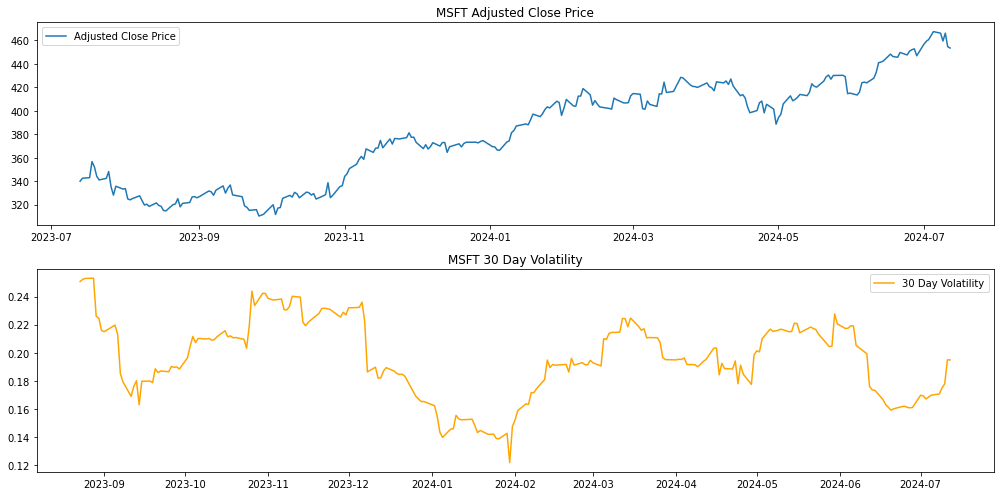

Value at Risk (VaR) for Microsoft at 95.0% confidence level: -0.022804172782206488


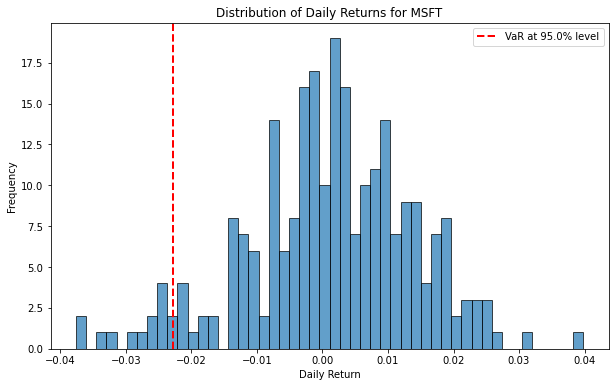

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to download data and calculate daily returns
def get_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Daily Return'] = data['Adj Close'].pct_change()
    data = data.dropna().copy()  # Ensure we are working with a copy
    return data

# Common setup for both Saudi Aramco and Microsoft
end_date = pd.to_datetime('today').normalize()
start_date = end_date - pd.DateOffset(years=1)
data_aramco = get_data('2222.SR', start_date, end_date)
data_microsoft = get_data('MSFT', start_date, end_date)

# Volatility Calculation for Microsoft
data_microsoft['30 Day Volatility'] = data_microsoft['Daily Return'].rolling(window=30).std() * np.sqrt(252)
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data_microsoft['Adj Close'], label='Adjusted Close Price')
plt.title('MSFT Adjusted Close Price')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data_microsoft['30 Day Volatility'], label='30 Day Volatility', color='orange')
plt.title('MSFT 30 Day Volatility')
plt.legend()
plt.tight_layout()
plt.show()

# VaR Calculation for Microsoft
confidence_level = 0.95
VaR_microsoft = np.percentile(data_microsoft['Daily Return'], (1 - confidence_level) * 100)
print(f'Value at Risk (VaR) for Microsoft at {confidence_level*100}% confidence level: {VaR_microsoft}')
plt.figure(figsize=(10, 6))
plt.hist(data_microsoft['Daily Return'], bins=50, edgecolor='k', alpha=0.7)
plt.axvline(VaR_microsoft, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_level*100}% level')
plt.title('Distribution of Daily Returns for MSFT')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Company  30 Day Volatility  VaR (95% confidence)
0  Saudi Aramco           0.142185             -0.012985
1     Microsoft           0.194869             -0.022804


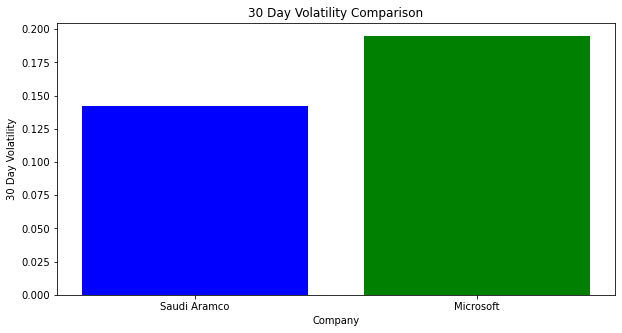

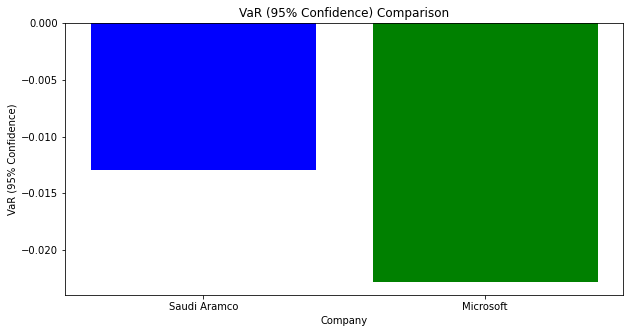

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to download data and calculate daily returns
def get_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Daily Return'] = data['Adj Close'].pct_change()
    data = data.dropna().copy()  # Ensure we are working with a copy
    return data

# Common setup for both Saudi Aramco and Microsoft
end_date = pd.to_datetime('today').normalize()
start_date = end_date - pd.DateOffset(years=1)
data_aramco = get_data('2222.SR', start_date, end_date)
data_microsoft = get_data('MSFT', start_date, end_date)

# Volatility Calculation
data_aramco['30 Day Volatility'] = data_aramco['Daily Return'].rolling(window=30).std() * np.sqrt(252)
data_microsoft['30 Day Volatility'] = data_microsoft['Daily Return'].rolling(window=30).std() * np.sqrt(252)

# VaR Calculation
confidence_level = 0.95
VaR_aramco = np.percentile(data_aramco['Daily Return'], (1 - confidence_level) * 100)
VaR_microsoft = np.percentile(data_microsoft['Daily Return'], (1 - confidence_level) * 100)

# Prepare the data for comparison
comparison_data = {
    'Company': ['Saudi Aramco', 'Microsoft'],
    '30 Day Volatility': [data_aramco['30 Day Volatility'].iloc[-1], data_microsoft['30 Day Volatility'].iloc[-1]],
    'VaR (95% confidence)': [VaR_aramco, VaR_microsoft]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
print(comparison_df)

# Plot the comparison of 30 Day Volatility
plt.figure(figsize=(10, 5))
plt.bar(comparison_df['Company'], comparison_df['30 Day Volatility'], color=['blue', 'green'])
plt.title('30 Day Volatility Comparison')
plt.xlabel('Company')
plt.ylabel('30 Day Volatility')
plt.show()

# Plot the comparison of VaR (95% confidence)
plt.figure(figsize=(10, 5))
plt.bar(comparison_df['Company'], comparison_df['VaR (95% confidence)'], color=['blue', 'green'])
plt.title('VaR (95% Confidence) Comparison')
plt.xlabel('Company')
plt.ylabel('VaR (95% Confidence)')
plt.show()
